<a href="https://colab.research.google.com/github/ThanhQuynh0202/VoNgocThanhQuynh_20104053_BTVN/blob/main/Nhan_dien_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Nhận diện các món ăn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd "/content/drive/My Drive/Colab Notebooks/BTVN/Mon an"

/content/drive/My Drive/Colab Notebooks/BTVN/Mon an


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Mon an/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3018 images belonging to 10 classes.


In [6]:
validation=train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Mon an/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 834 images belonging to 10 classes.


In [7]:
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [8]:
validation.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
95/95 [==============================] - 923s 10s/step - loss: 2.7298 - accuracy: 0.1100 - val_loss: 2.2865 - val_accuracy: 0.1259
Epoch 2/50
95/95 [==============================] - 82s 863ms/step - loss: 2.2032 - accuracy: 0.1975 - val_loss: 2.1037 - val_accuracy: 0.2302
Epoch 3/50
95/95 [==============================] - 80s 840ms/step - loss: 1.8870 - accuracy: 0.3436 - val_loss: 1.7663 - val_accuracy: 0.3885
Epoch 4/50
95/95 [==============================] - 82s 861ms/step - loss: 1.6110 - accuracy: 0.4513 - val_loss: 1.5592 - val_accuracy: 0.4940
Epoch 5/50
95/95 [==============================] - 80s 843ms/step - loss: 1.4143 - accuracy: 0.5262 - val_loss: 1.3279 - val_accuracy: 0.5420
Epoch 6/50
95/95 [==============================] - 81s 859ms/step - loss: 1.2642 - accuracy: 0.5755 - val_loss: 1.1967 - val_accuracy: 0.6007
Epoch 7/50
95/95 [==============================] - 80s 839ms/step - loss: 1.1626 - accuracy: 0.6183 - val_loss: 1.0949 - val_accuracy: 0.6475


In [11]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.03786081075668335
Train Accuracy 0.9880715608596802


<function matplotlib.pyplot.show(*args, **kw)>

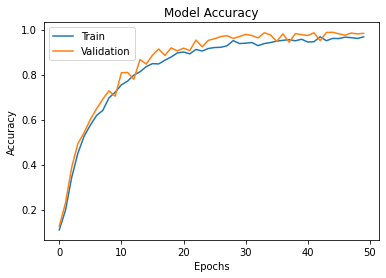

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
model.save("Food.h5")

In [14]:
model_CNN=load_model('Food.h5')

1/1 [==============================] - 0s 16ms/step
Pho


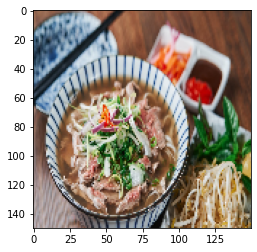

1/1 [==============================] - 0s 16ms/step
Nem


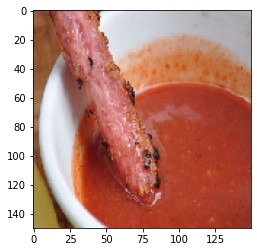

1/1 [==============================] - 0s 16ms/step
Com tam


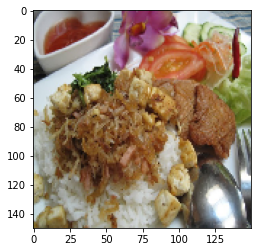

1/1 [==============================] - 0s 18ms/step
Ca kho to


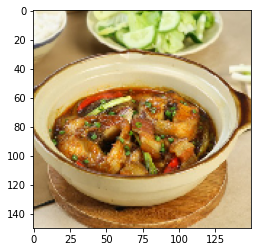

1/1 [==============================] - 0s 17ms/step
Bun dau mam tom


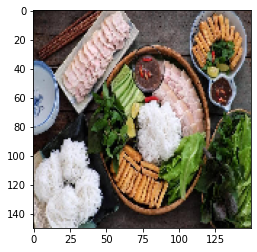

1/1 [==============================] - 0s 16ms/step
Banh xeo


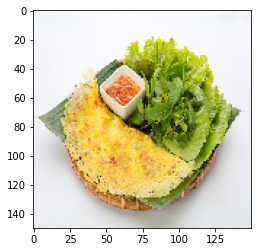

1/1 [==============================] - 0s 16ms/step
Banh tet


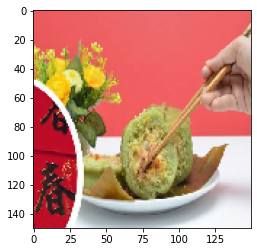

1/1 [==============================] - 0s 20ms/step
Banh pia


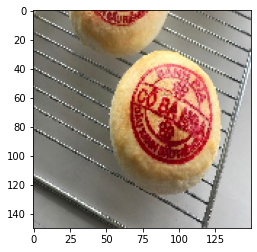

1/1 [==============================] - 0s 16ms/step
Banh mi


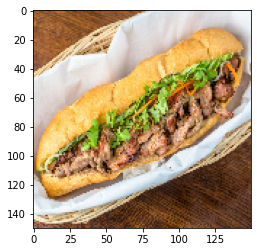

1/1 [==============================] - 0s 19ms/step
Banh cuon


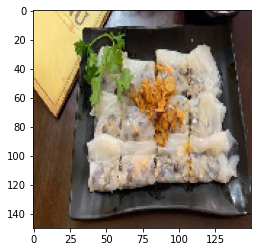

In [16]:
test="/content/drive/My Drive/Colab Notebooks/BTVN/Mon an/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Banh cuon'
  if round(result[0][1])==1:
    prediction='Banh mi'
  if round(result[0][2])==1:
    prediction='Banh pia'
  if round(result[0][3])==1:
    prediction='Banh tet'
  if round(result[0][4])==1:
    prediction='Banh xeo'
  if round(result[0][5])==1:
    prediction='Bun dau mam tom'
  if round(result[0][6])==1:
    prediction='Ca kho to'
  if round(result[0][7])==1:
    prediction='Com tam'
  if round(result[0][8])==1:
    prediction='Nem'
  if round(result[0][9])==1:
    prediction='Pho'
  print(prediction)
  plt.show()